In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [3]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


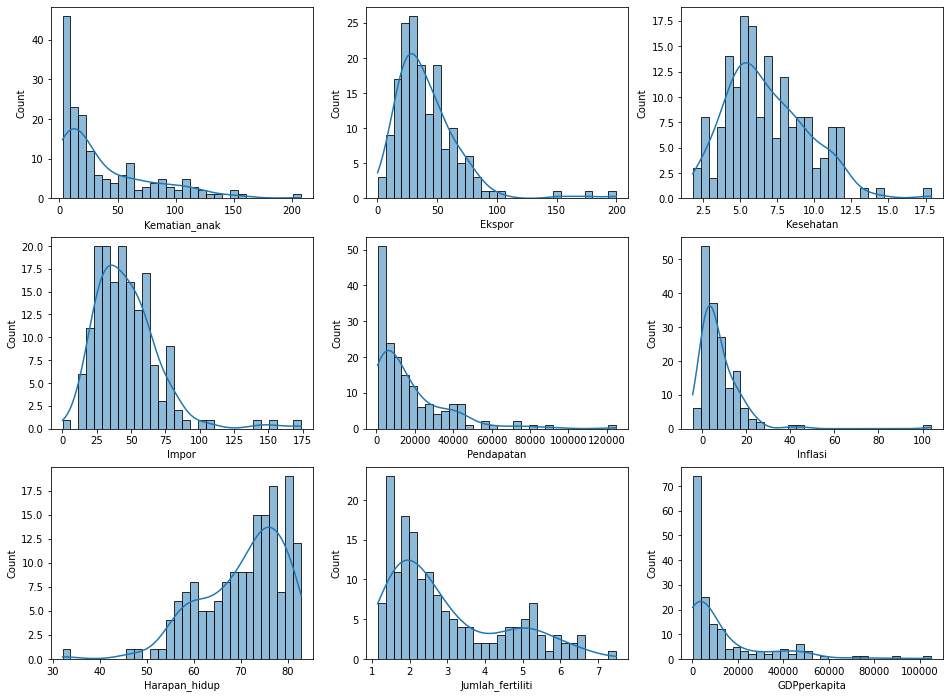

In [5]:
plt.figure(figsize=(16,12));
for i in enumerate(df.drop('Negara', axis=1).columns):
  plt.subplot(3,3, i[0]+1);
  sns.histplot(df[i[1]], kde=True, bins=30);
plt.show();

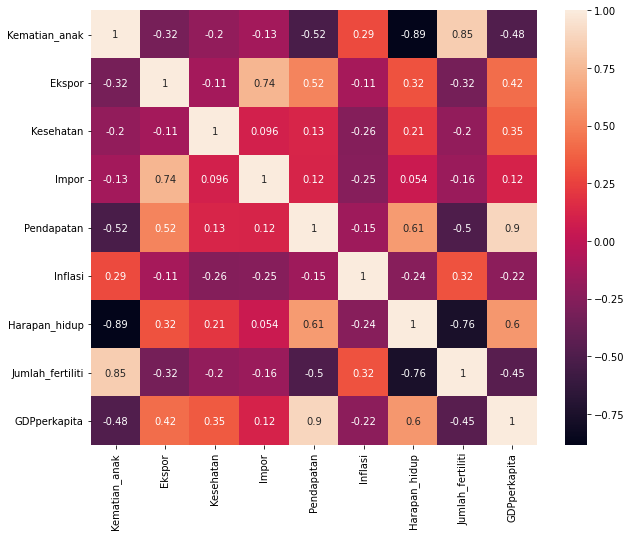

In [6]:
plt.figure(figsize=(10,8));
sns.heatmap(df.corr(), annot=True, fmt='.2g');

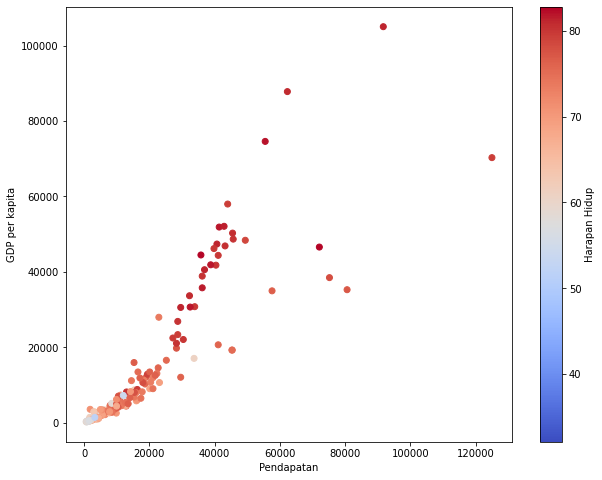

In [7]:
#sns.scatterplot(x='Pendapatan', y='GDPperkapita',data=df)
plt.figure(figsize=(10,8));
plt.scatter(df['Pendapatan'],df['GDPperkapita'], c=df['Harapan_hidup'], cmap='coolwarm')
plt.xlabel('Pendapatan')
plt.ylabel('GDP per kapita')
plt.colorbar(label='Harapan Hidup')

In [8]:
#plt.figure(figsize=(16,12));
#sns.pairplot(df)

#KESEHATAN DAN HARAPAN HIDUP

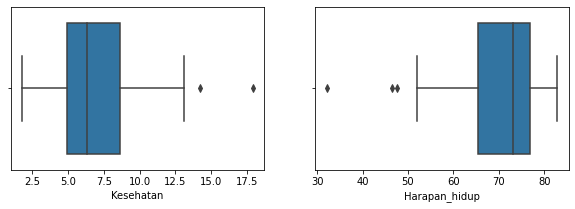

In [9]:
#kesehatan dan harapan hidup
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Kesehatan', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Harapan_hidup', data=df)
plt.show()

In [10]:
import numpy as np
def find_outlier(xx):
  q3 = np.percentile(xx, 75)
  q1 = np.percentile(xx, 25)
  bb = q1 - (q3-q1)*1.5
  ba = q3 + (q3-q1)*1.5
  df_final = xx[((xx<bb) | (xx>ba))]
  return df_final

In [11]:
out_health_index = (find_outlier(df['Harapan_hidup']) + find_outlier(df['Kesehatan'])).index
out_health_index

Int64Index([31, 66, 87, 101, 159], dtype='int64')

In [12]:
df[df.index == 101]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.8,65.4,3.46,2860


In [13]:
df_health = df.drop(out_health_index, 0).drop(df.columns.difference(['Harapan_hidup','Kesehatan']), 1)
df_health

,Kesehatan,Harapan_hidup
0,7.58,56.2
1,6.55,76.3
2,4.17,76.5
3,2.85,60.1
4,6.03,76.8
...,...,...
162,5.25,63.0
163,4.91,75.4
164,6.84,73.1
165,5.18,67.5


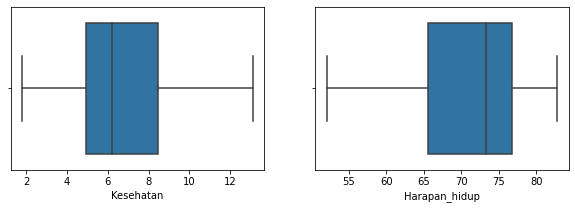

In [14]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Kesehatan', data=df_health)
plt.subplot(1,2,2)
sns.boxplot(x='Harapan_hidup', data=df_health)
plt.show()

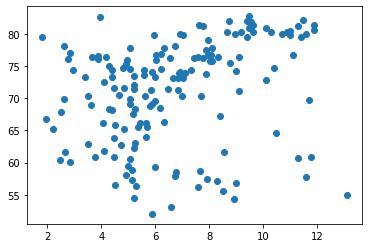

In [15]:
plt.scatter(x=df_health['Kesehatan'], y=df_health['Harapan_hidup'])

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df_health)
#df_std

In [17]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [18]:
df_n = pd.DataFrame(data=df_std, columns=['Kesehatan', 'Harapan_hidup']).set_index(df_health.index)
df_n['label1_kmeans'] = labels1
df_n

,Kesehatan,Harapan_hidup,label1_kmeans
0,0.349366,-1.854907,1
1,-0.055940,0.653169,0
2,-0.992472,0.678125,1
3,-1.511893,-1.368266,1
4,-0.260561,0.715559,0
...,...,...,...
162,-0.567491,-1.006404,1
163,-0.701282,0.540867,1
164,0.058175,0.253873,0
165,-0.595036,-0.444894,1


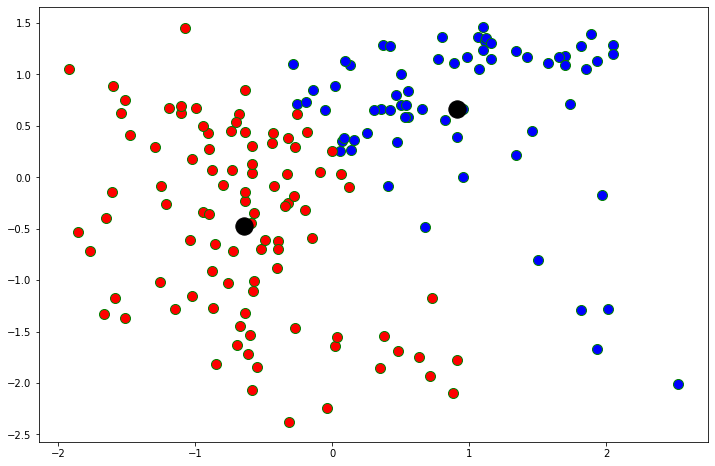

In [19]:
plt.figure(figsize=(12,8))

plt.scatter(df_n['Kesehatan'][df_n.label1_kmeans == 0], df_n['Harapan_hidup'][df_n.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_n['Kesehatan'][df_n.label1_kmeans == 1], df_n['Harapan_hidup'][df_n.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

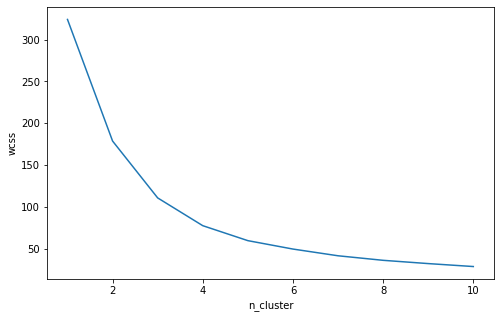

In [20]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [21]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([0, 1, 1, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 0,
       2, 1, 1, 0, 0, 3, 3, 2, 1, 3, 2, 1, 2, 3, 0, 3, 2, 3, 2, 1, 2, 2,
       1, 2, 1, 1, 3, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 1,
       2, 3, 3, 1, 0, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 3, 1, 1, 0, 1, 1,
       2, 1, 3, 0, 1, 1, 3, 2, 3, 1, 2, 3, 2, 1, 3, 3, 0, 3, 2, 2, 3, 3,
       2, 1, 3, 2, 1, 1, 3, 2, 2, 1, 1, 1, 0, 1, 1, 3, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 0, 1, 1, 1, 3, 0, 1, 1,
       2, 2, 1, 3, 1, 1, 3, 0], dtype=int32)

In [22]:
df_n['label2_kmeans'] = labels2
df_n

,Kesehatan,Harapan_hidup,label1_kmeans,label2_kmeans
0,0.349366,-1.854907,1,0
1,-0.055940,0.653169,0,1
2,-0.992472,0.678125,1,1
3,-1.511893,-1.368266,1,3
4,-0.260561,0.715559,0,1
...,...,...,...,...
162,-0.567491,-1.006404,1,3
163,-0.701282,0.540867,1,1
164,0.058175,0.253873,0,1
165,-0.595036,-0.444894,1,3


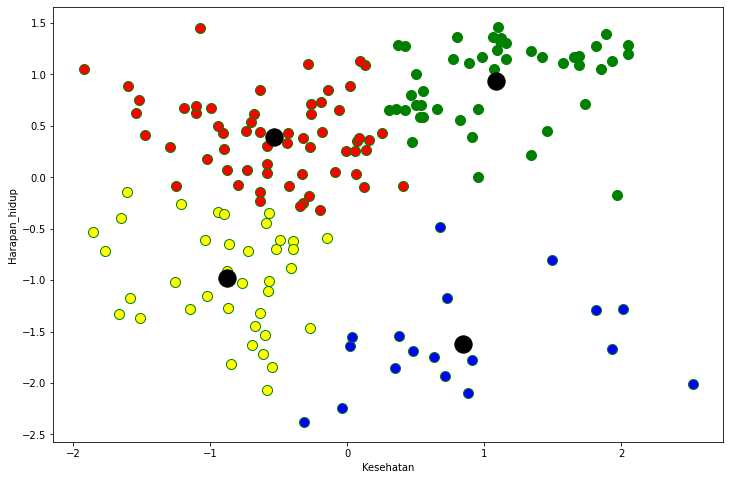

In [23]:
plt.figure(figsize=(12,8))

plt.scatter(df_n['Kesehatan'][df_n.label2_kmeans == 0], df_n['Harapan_hidup'][df_n.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_n['Kesehatan'][df_n.label2_kmeans == 1], df_n['Harapan_hidup'][df_n.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df_n['Kesehatan'][df_n.label2_kmeans == 2], df_n['Harapan_hidup'][df_n.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(df_n['Kesehatan'][df_n.label2_kmeans == 3], df_n['Harapan_hidup'][df_n.label2_kmeans == 3], c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Kesehatan')
plt.ylabel('Harapan_hidup')
plt.show()

####cluster biru : cluster dengan kesehatan tinggi dan harapan hidup rendah
####cluster hijau : cluster dengan kesehatan tinggi dan harapan hidup tinggi
####cluster merah : cluster dengan kesehatan menengah dan harapan hidup tinggi
####cluster kuning : cluster dengan kesehatan rendah namun harapan hidup menengah-rendah
#kluster kuning berpotensi negara dengan kesehatan yang rendah begitupula dengan harapan hidupnya yang rendah

In [24]:
cluster_low_health = df_n[(df_n['label2_kmeans']==3)]
cluster_low_health.head(10)

,Kesehatan,Harapan_hidup,label1_kmeans,label2_kmeans
3,-1.511893,-1.368266,1,3
17,-1.020017,-1.156140,1,3
27,-0.398286,-0.619586,1,3
28,-0.614711,-1.717649,1,3
32,-0.850812,-1.817473,1,3
36,-0.858682,-0.644542,1,3
38,-1.665358,-1.330832,1,3
40,-0.547816,-1.842429,1,3
49,-0.870487,-1.268442,1,3
50,-1.586658,-1.168618,1,3


In [25]:
#negara2 kluster 3 dengan kesehatan rendah dan harapan hidup rendah
df_low_health = df[df.index.isin(cluster_low_health.index)]
df_low_health

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
40,Cote d'Ivoire,111.0,50.600,5.30,43.3000,2690,5.390,56.3,5.27,1220
49,Equatorial Guinea,111.0,85.800,4.48,58.9000,33700,24.900,60.9,5.21,17100
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482


Text(0.5, 1.0, 'Detail Kesehatan Negara Hasil Clustering')

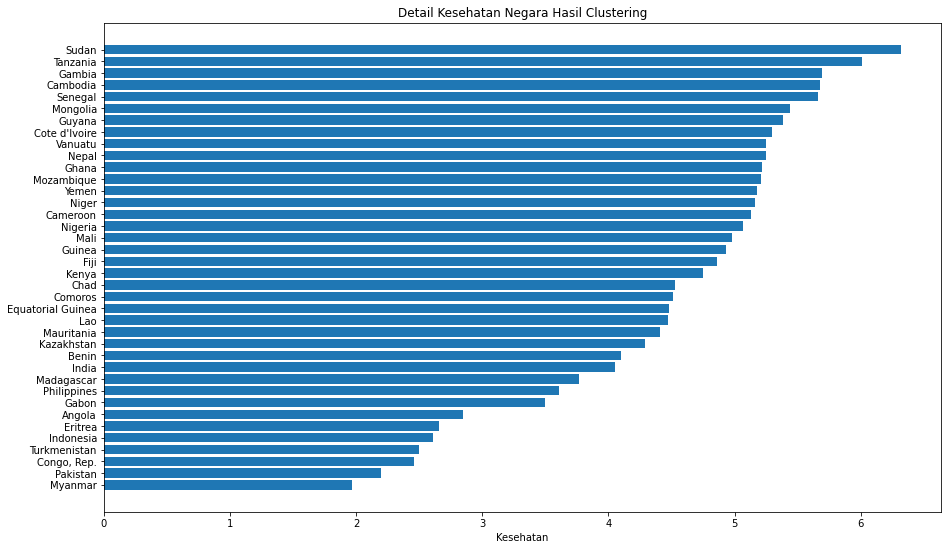

In [96]:
#df_low_health['Kesehatan'].sort_values().plot(kind='bar', x=df_low_health['Negara'])
plt.figure(figsize=(15,9))
plt.barh(df_low_health.sort_values('Kesehatan')['Negara'], df_low_health['Kesehatan'].sort_values(), 0.8)
plt.xlabel('Kesehatan')
plt.title('Detail Kesehatan Negara Hasil Clustering')

Text(0.5, 1.0, 'Detail Harapan Hidup Negara Hasil Clustering')

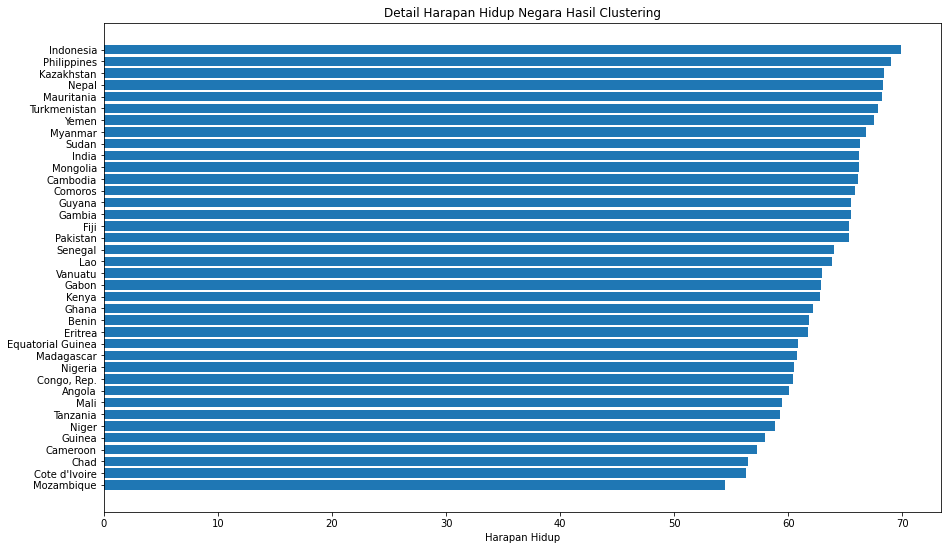

In [97]:
plt.figure(figsize=(15,9))
plt.barh(df_low_health.sort_values('Harapan_hidup')['Negara'], df_low_health['Harapan_hidup'].sort_values(), 0.8)
plt.xlabel('Harapan Hidup')
plt.title('Detail Harapan Hidup Negara Hasil Clustering')

#EKSPOR-IMPOR NEGARA

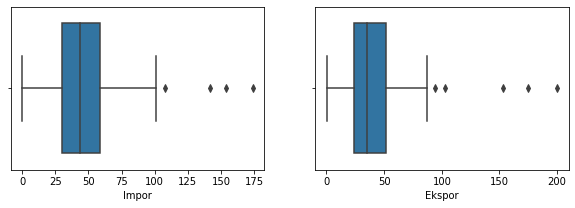

In [26]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Impor', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Ekspor', data=df)
plt.show()

In [27]:
out_expor_impor = (find_outlier(df['Impor']) + find_outlier(df['Ekspor'])).index
out_expor_impor

Int64Index([73, 91, 98, 131, 133], dtype='int64')

In [28]:
df_ekspor_impor = df.drop(out_expor_impor, 0).drop(df.columns.difference(['Impor','Ekspor']), 1)
df_ekspor_impor

,Ekspor,Impor
0,10.0,44.9
1,28.0,48.6
2,38.4,31.4
3,62.3,42.9
4,45.5,58.9
...,...,...
162,46.6,52.7
163,28.5,17.6
164,72.0,80.2
165,30.0,34.4


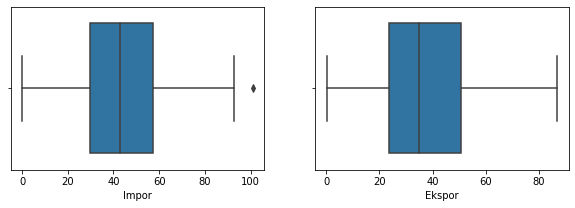

In [29]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Impor', data=df_ekspor_impor)
plt.subplot(1,2,2)
sns.boxplot(x='Ekspor', data=df_ekspor_impor)
plt.show()

Text(0, 0.5, 'Ekspor')

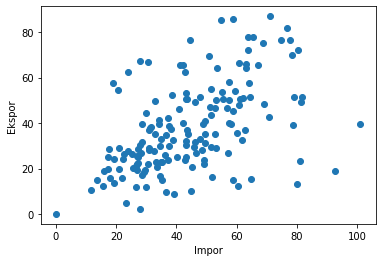

In [30]:
plt.scatter(x=df_ekspor_impor['Impor'], y=df_ekspor_impor['Ekspor'])
plt.xlabel('Impor')
plt.ylabel('Ekspor')

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std2 = sc.fit_transform(df_ekspor_impor)

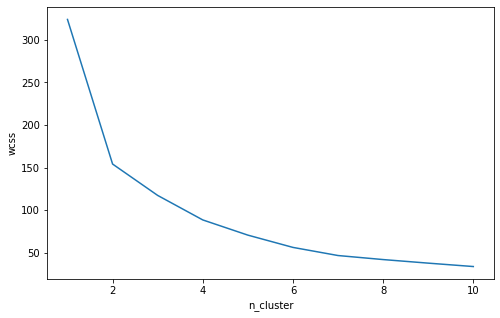

In [32]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [33]:
kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std2)
labels3 = kmeans3.labels_
labels3

array([0, 3, 1, 1, 3, 0, 3, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 3, 1, 3, 1,
       0, 1, 1, 0, 0, 2, 0, 0, 3, 0, 1, 1, 0, 0, 3, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 0, 3, 2, 0, 2, 2, 1, 0, 1, 0, 3, 1, 3, 0, 3, 0, 1, 0, 2,
       3, 2, 1, 0, 0, 0, 1, 1, 0, 3, 0, 2, 1, 0, 3, 1, 2, 3, 2, 3, 3, 3,
       1, 2, 3, 0, 0, 2, 2, 0, 2, 2, 3, 3, 3, 3, 1, 3, 0, 2, 0, 2, 0, 3,
       0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 0, 3, 0, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 0, 2, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1], dtype=int32)

In [34]:
df_n2 = pd.DataFrame(data=df_std2, columns=['Impor', 'Ekspor']).set_index(df_ekspor_impor.index)
df_n2['label3_kmeans'] = labels3
df_n2

,Impor,Ekspor,label3_kmeans
0,-1.440686,0.036333,0
1,-0.511334,0.238666,3
2,0.025624,-0.701910,1
3,1.259597,-0.073036,1
4,0.392202,0.801919,3
...,...,...,...
162,0.448996,0.462874,1
163,-0.485519,-1.456559,0
164,1.760414,1.966703,2
165,-0.408073,-0.537856,0


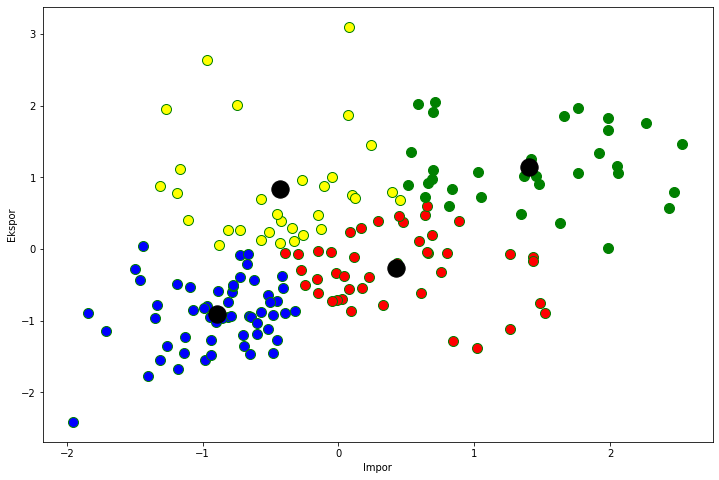

In [35]:
plt.figure(figsize=(12,8))

plt.scatter(df_n2['Impor'][df_n2.label3_kmeans == 0], df_n2['Ekspor'][df_n2.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_n2['Impor'][df_n2.label3_kmeans == 1], df_n2['Ekspor'][df_n2.label3_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df_n2['Impor'][df_n2.label3_kmeans == 2], df_n2['Ekspor'][df_n2.label3_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(df_n2['Impor'][df_n2.label3_kmeans == 3], df_n2['Ekspor'][df_n2.label3_kmeans == 3], c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Impor')
plt.ylabel('Ekspor')
plt.show()

####cluster biru : cluster dengan impor rendah dan ekspor rendah
####cluster kuning : cluster dengan impor rendah dan ekspor tinggi
####cluster merah : cluster dengan impor tinggi namun ekspor menengah
####cluster hijau : cluster dengan impor tinggi dan ekspor tinggi

#catatan : negara defisit jika impor tinggi namun ekspor rendah, cluster merah berpotensi merupakan negara2 miskin karena jumlah impor yang tinggi tidak diimbangi dengan ekspor yang tinggi pula



In [104]:
cluster_low_impor_ekspor = df_n2[(df_n2['label3_kmeans']==3)]
cluster_low_impor_ekspor.head(10)

,Impor,Ekspor,label3_kmeans
1,-0.511334,0.238666,3
4,0.392202,0.801919,3
6,-0.883075,0.058207,3
18,0.237310,1.447198,3
20,-0.423562,0.386315,3
30,-0.268670,0.960504,3
36,-1.105087,0.408189,3
48,-0.568128,0.129297,3
57,-0.149920,0.468342,3
59,-0.433888,0.091018,3


In [105]:
#negara2 kluster 3 dengan impor tinggi namun ekpor rendah
df_low_impor_ekspor = df[df.index.isin(cluster_low_impor_ekspor.index)]
df_low_impor_ekspor

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769
48,El Salvador,19.2,26.9,6.91,46.6,7300,2.650,74.1,2.27,2990
57,Georgia,16.5,35.0,10.10,52.8,6730,8.550,72.8,1.92,2960
59,Ghana,74.7,29.5,5.22,45.9,3060,16.600,62.2,4.27,1310


Text(0.5, 1.0, 'Detail Ekspor Negara Hasil Clustering')

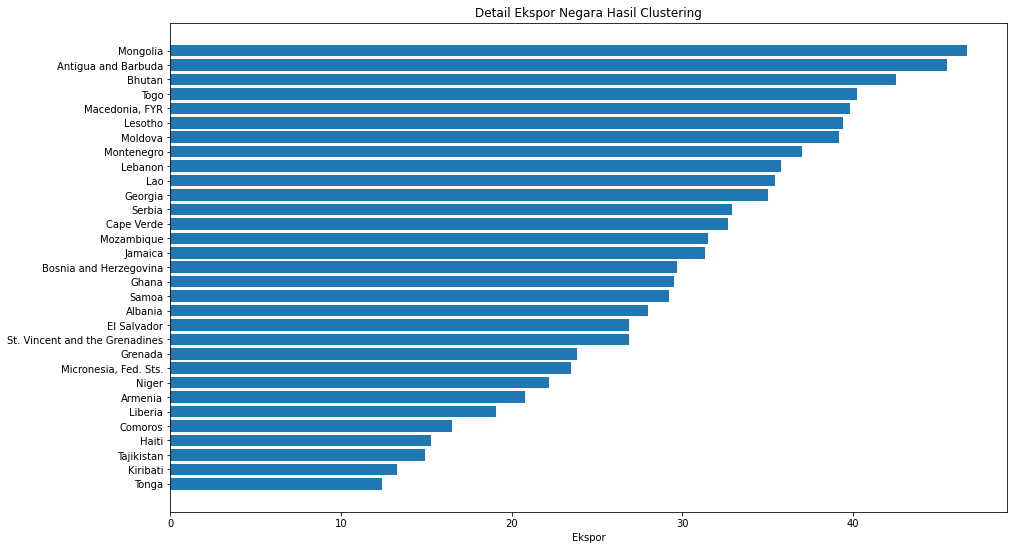

In [107]:
plt.figure(figsize=(15,9))
plt.barh(df_low_impor_ekspor.sort_values('Ekspor')['Negara'], df_low_impor_ekspor['Ekspor'].sort_values(), 0.8)
plt.xlabel('Ekspor')
plt.title('Detail Ekspor Negara Hasil Clustering')

#HUBUNGAN JUMLAH FERTILITI DENGAN PENDAPATAN PERORANG

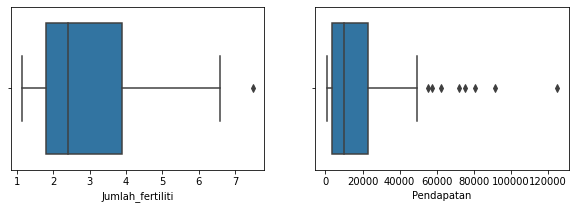

In [38]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Jumlah_fertiliti', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Pendapatan', data=df)
plt.show()

Text(0, 0.5, 'Pendapatan')

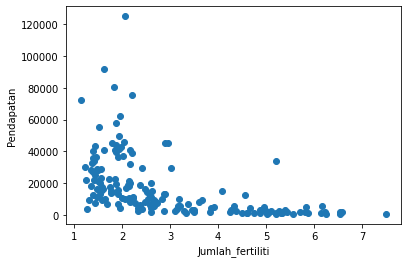

In [39]:
plt.scatter(x=df['Jumlah_fertiliti'], y=df['Pendapatan'])
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Pendapatan')

In [40]:
out_fert_income = (find_outlier(df['Pendapatan'])).index
out_fert_income

Int64Index([23, 82, 91, 114, 123, 133, 145, 157], dtype='int64')

In [41]:
df_fert_income = df.drop(out_fert_income, 0).drop(df.columns.difference(['Pendapatan','Jumlah_fertiliti']), 1)
df_fert_income

,Pendapatan,Jumlah_fertiliti
0,1610,5.82
1,9930,1.65
2,12900,2.89
3,5900,6.16
4,19100,2.13
...,...,...
162,2950,3.50
163,16500,2.47
164,4490,1.95
165,4480,4.67


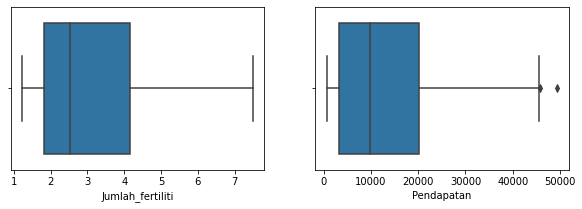

In [42]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Jumlah_fertiliti', data=df_fert_income)
plt.subplot(1,2,2)
sns.boxplot(x='Pendapatan', data=df_fert_income)
plt.show()

Text(0, 0.5, 'Pendapatan')

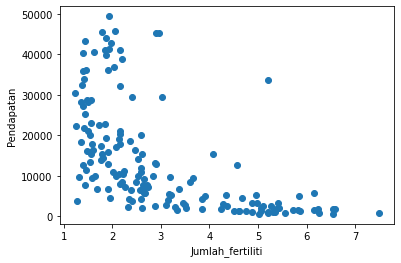

In [43]:
plt.scatter(x=df_fert_income['Jumlah_fertiliti'], y=df_fert_income['Pendapatan'])
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Pendapatan')

In [44]:
df_std3 = sc.fit_transform(df_fert_income)

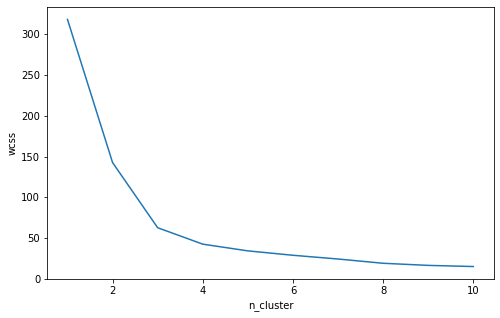

In [45]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [46]:
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std3)
labels4 = kmeans4.labels_
labels4

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2], dtype=int32)

In [47]:
df_n3 = pd.DataFrame(data=df_std3, columns=['Jumlah_fertiliti', 'Pendapatan']).set_index(df_fert_income.index)
df_n3['label4_kmeans'] = labels4
df_n3

,Jumlah_fertiliti,Pendapatan,label4_kmeans
0,-0.950815,1.848785,2
1,-0.317848,-0.891596,0
2,-0.091898,-0.076711,0
3,-0.624441,2.072221,2
4,0.379784,-0.576157,0
...,...,...,...
162,-0.848871,0.324160,0
163,0.181982,-0.352720,0
164,-0.731711,-0.694446,0
165,-0.732472,1.093044,2


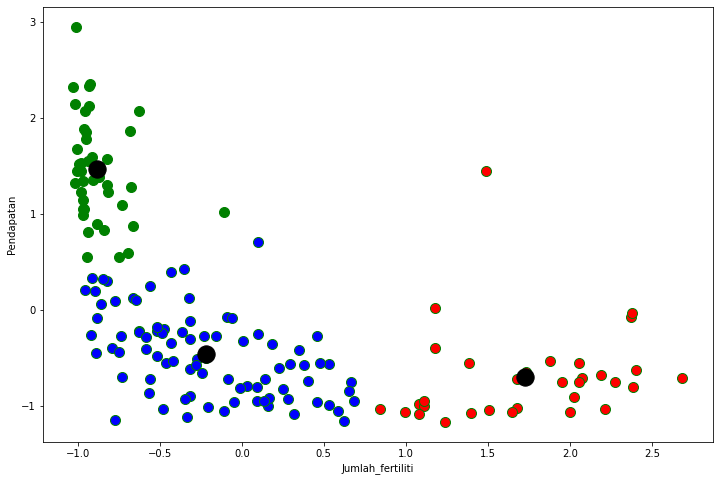

In [48]:
plt.figure(figsize=(12,8))

plt.scatter(df_n3['Jumlah_fertiliti'][df_n3.label4_kmeans == 0], df_n3['Pendapatan'][df_n3.label4_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_n3['Jumlah_fertiliti'][df_n3.label4_kmeans == 1], df_n3['Pendapatan'][df_n3.label4_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df_n3['Jumlah_fertiliti'][df_n3.label4_kmeans == 2], df_n3['Pendapatan'][df_n3.label4_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans4.cluster_centers_[:, 0],kmeans4.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Pendapatan')
plt.show()

####cluster hijau : cluster dengan fertiliti rendah namun pendapatan tinggi
####cluster biru : cluster dengan fertiliti menengah namun pendapatan menengah
####cluster merah : cluster dengan fertiliti tinggi namun pendapatan rendah
##cluster merah berpotensi merupakan negara dengan ekonomi rendah dan padat penduduk, dimana fertiliti sangat tinggi namun pendapatan perorangan sangat rendah

In [49]:
cluster_low_income = df_n3[df_n3['label4_kmeans']==2]
cluster_low_income.shape

(42, 3)

In [50]:
#negara2 kluster 1 dengan fertiliti tinggi namun pendapatan rendah
df_low_income = df[df.index.isin(cluster_low_income.index)]
df_low_income

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334


Text(0.5, 1.0, 'Detail Pendapatan Negara Hasil Clustering')

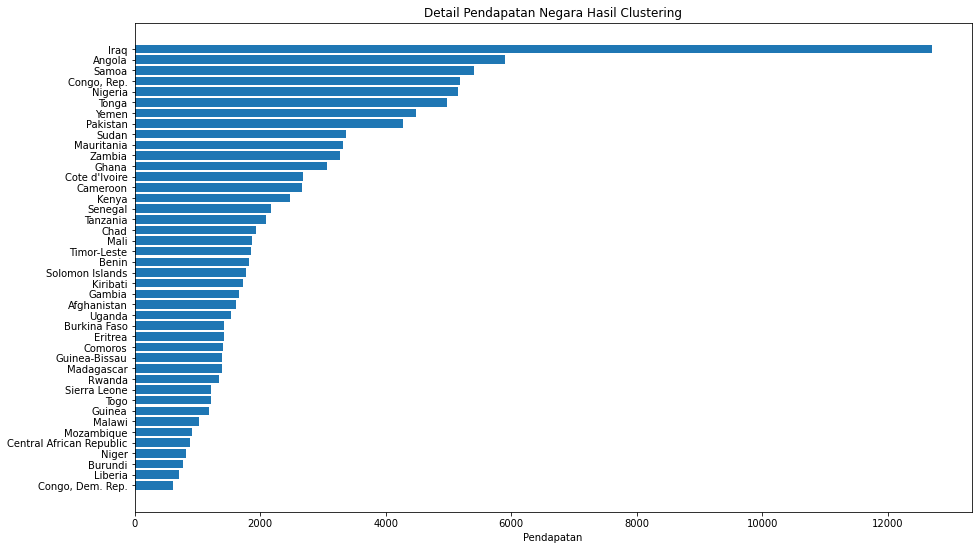

In [98]:
plt.figure(figsize=(15,9))
plt.barh(df_low_income.sort_values('Pendapatan')['Negara'], df_low_income['Pendapatan'].sort_values(), 0.8)
plt.xlabel('Pendapatan')
plt.title('Detail Pendapatan Negara Hasil Clustering')

Text(0.5, 1.0, 'Detail Jumlah Fertiliti Negara Hasil Clustering')

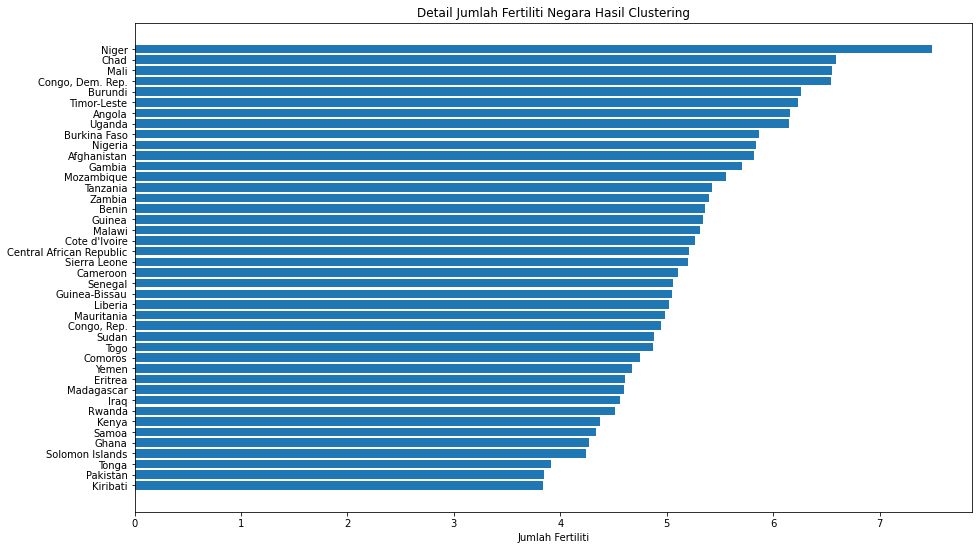

In [99]:
plt.figure(figsize=(15,9))
plt.barh(df_low_income.sort_values('Jumlah_fertiliti')['Negara'], df_low_income['Jumlah_fertiliti'].sort_values(), 0.8)
plt.xlabel('Jumlah Fertiliti')
plt.title('Detail Jumlah Fertiliti Negara Hasil Clustering')

#PENGARUH INFLASI TERHADAP GDPPERKAPITA

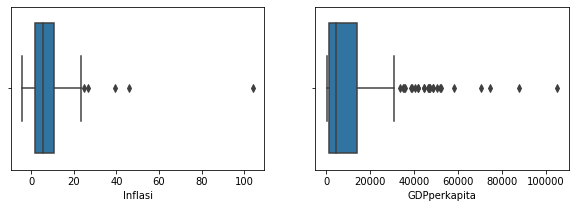

In [51]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Inflasi', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='GDPperkapita', data=df)
plt.show()

Text(0, 0.5, 'GDPperkapita')

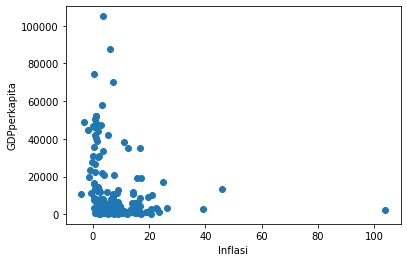

In [52]:
plt.scatter(x=df['Inflasi'], y=df['GDPperkapita'])
plt.xlabel('Inflasi')
plt.ylabel('GDPperkapita')

In [53]:
out_inf_gdp = (find_outlier(df['Inflasi']) + find_outlier(df['GDPperkapita'])).index
out_inf_gdp

Int64Index([  7,   8,  15,  23,  29,  44,  49,  53,  54,  58,  68,  73,  75,
             77,  82,  91, 103, 110, 111, 113, 114, 123, 133, 144, 145, 149,
            157, 158, 159, 163],
           dtype='int64')

In [54]:
df_inf_gdp = df.drop(out_inf_gdp, 0).drop(df.columns.difference(['Inflasi','GDPperkapita']), 1)
df_inf_gdp

,Inflasi,GDPperkapita
0,9.44,553
1,4.49,4090
2,16.10,4460
3,22.40,3530
4,1.44,12200
...,...,...
161,16.50,1380
162,2.62,2970
164,12.10,1310
165,23.60,1310


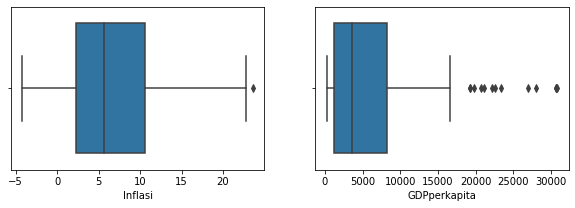

In [55]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1)
sns.boxplot(x='Inflasi', data=df_inf_gdp)
plt.subplot(1,2,2)
sns.boxplot(x='GDPperkapita', data=df_inf_gdp)
plt.show()

Text(0, 0.5, 'GDPperkapita')

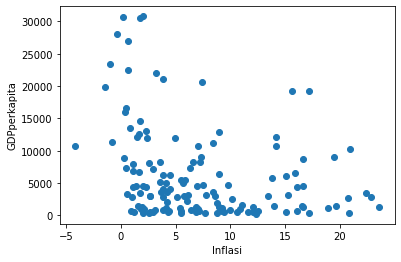

In [56]:
plt.scatter(x=df_inf_gdp['Inflasi'], y=df_inf_gdp['GDPperkapita'])
plt.xlabel('Inflasi')
plt.ylabel('GDPperkapita')

In [57]:
df_std4 = sc.fit_transform(df_inf_gdp)

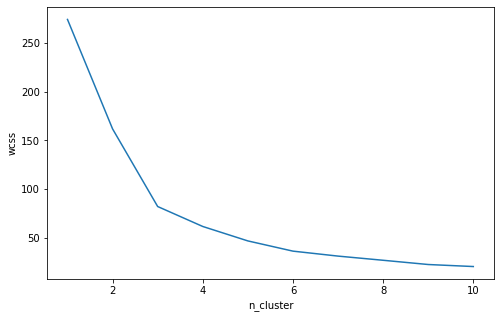

In [58]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std4)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [59]:
kmeans5 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std4)
labels5 = kmeans5.labels_
labels5

array([0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 2], dtype=int32)

In [60]:
df_n4 = pd.DataFrame(data=df_std4, columns=['Inflasi', 'GDPperkapita']).set_index(df_inf_gdp.index)
df_n4['label5_kmeans'] = labels5
df_n4

,Inflasi,GDPperkapita,label5_kmeans
0,0.373531,-0.806523,0
1,-0.436737,-0.308968,0
2,1.463709,-0.256920,2
3,2.494959,-0.387744,2
4,-0.935993,0.831878,1
...,...,...,...
161,1.529185,-0.690188,2
162,-0.742838,-0.466520,0
164,0.808947,-0.700035,2
165,2.691387,-0.700035,2


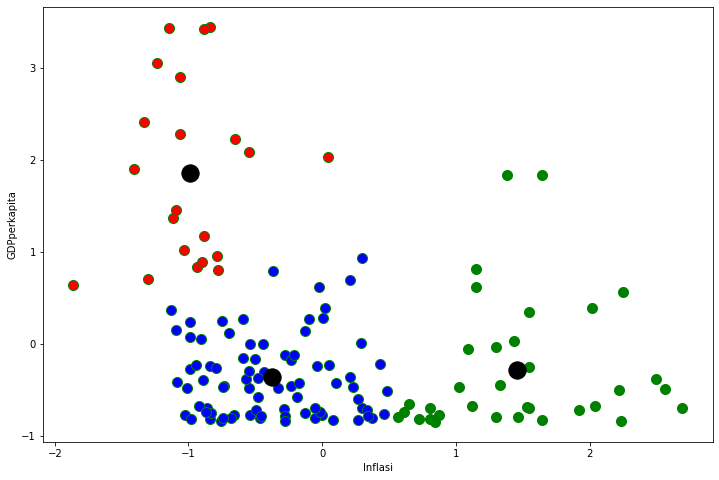

In [61]:
plt.figure(figsize=(12,8))

plt.scatter(df_n4['Inflasi'][df_n4.label5_kmeans == 0], df_n4['GDPperkapita'][df_n4.label5_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_n4['Inflasi'][df_n4.label5_kmeans == 1], df_n4['GDPperkapita'][df_n4.label5_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df_n4['Inflasi'][df_n4.label5_kmeans == 2], df_n4['GDPperkapita'][df_n4.label5_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans5.cluster_centers_[:, 0],kmeans5.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Inflasi')
plt.ylabel('GDPperkapita')
plt.show()

In [62]:
cluster_inf_gdp = df_n4[(df_n4['label5_kmeans']==0) | (df_n4['label5_kmeans']==2)]
cluster_inf_gdp.shape

(116, 3)

In [63]:
df_inf_gdp = df[df.index.isin(cluster_inf_gdp.index)]
df_inf_gdp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [64]:
df[df['Inflasi'] == df['Inflasi'].max()]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


#KANDIDAT NEGARA MISKIN BERDASAR GABUNGAN 3 FAKTOR (EKSPOR-IMPOR, KESEHATAN-HARAPAN HIDUP, FERTILITI-PENDAPATAN

In [65]:
#df_low_health
#df_low_impor_ekspor
#df_low_income
#df_inf_gdp
low_economy = pd.merge(df_low_impor_ekspor, df_low_income, on='Negara', how='inner')
low_economy_and_health = pd.merge(low_economy, df_low_health, on='Negara', how='inner')
df_final = low_economy_and_health.drop(columns=low_economy_and_health.columns[1:19])
df_final

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Comoros,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769
1,Ghana,74.7,29.5,5.22,45.9,3060,16.60,62.2,4.27,1310
2,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
3,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348


In [109]:
df_final1 = df_final.drop(columns=['Kematian_anak', 'Ekspor', 'Impor', 'Inflasi', 'Jumlah_fertiliti'])
df_final1
#df_final1.sort_values(by='GDPperkapita')

,Negara,Kesehatan,Pendapatan,Harapan_hidup,GDPperkapita
0,Comoros,4.51,1410,65.9,769
1,Ghana,5.22,3060,62.2,1310
2,Mozambique,5.21,918,54.5,419
3,Niger,5.16,814,58.8,348


In [67]:
#norm = np.linalg.norm([df_final1['Harapan_hidup']])
#norm = df_final1['Harapan_hidup']-50
#norm

In [68]:
#plt.figure(figsize=(12,8))
#plt.scatter(x=df_final1['Pendapatan'], y=df_final1['GDPperkapita'], s=norm**3)
#plt.xlim([500, 4000])
#plt.ylim([200, 1500])

In [69]:
def skor(xx):
  suma =  sum(xx)
  skors = xx/suma*100
  return skors

In [70]:
#skor(df_final1['Pendapatan']).values.tolist()
df2 ={'Negara': df_final1['Negara'].values.tolist(),
      'GDPperkapita': skor(df_final1['GDPperkapita']).values.tolist(),
      'Pendapatan': skor(df_final1['Pendapatan']).values.tolist(),
      'Kesehatan': skor(df_final1['Kesehatan']).values.tolist(),
      'Harapan Hidup': skor(df_final1['Harapan_hidup']).values.tolist(),}
df_finals = pd.DataFrame(df2)
df_final2 = df_finals.drop(index=1).reset_index(drop=True)
df_final2

,Negara,GDPperkapita,Pendapatan,Kesehatan,Harapan Hidup
0,Comoros,27.020379,22.734602,22.437811,27.299089
1,Mozambique,14.722417,14.801677,25.920398,22.576636
2,Niger,12.227688,13.124798,25.671642,24.357912


In [71]:
np.linspace(1.2,-1.2, 4)

array([ 1.2,  0.4, -0.4, -1.2])

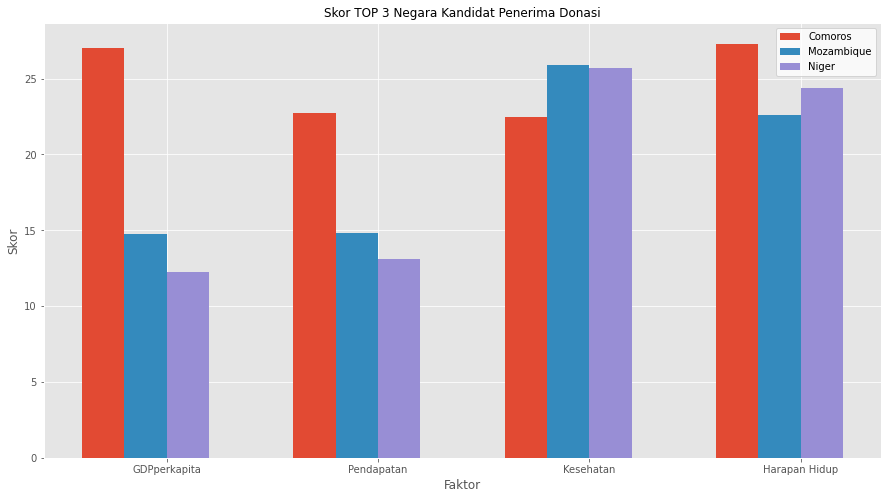

In [72]:
import numpy as np
x = np.arange(4)*4
xi = np.linspace(1.2,-1.2, 4)
fig = plt.figure(figsize=(15,8))

for i,j in enumerate(df_final2['Negara']):
  with plt.style.context('ggplot'):
    plt.bar(x-xi[i], df_final2.iloc[i].drop('Negara'), 0.8)
plt.xticks(x, df_final2.iloc[1].drop('Negara').index)
plt.xlabel('Faktor')
plt.ylabel('Skor')
plt.legend(df_final2['Negara'])
plt.title('Skor TOP 3 Negara Kandidat Penerima Donasi')
plt.show()

jika dikerucutkan hingga ditemukan satu negara yang pantas mendapat donasi, maka negara niger adalah yang paling pantas menerima sumbangan. mengingat negara ini melingkupi segala aspek dan syarat untuk menerima donasi yaitu ekonomi dan kesehatan yang paling rendah secara keseluruhan